# Aula X - Classes desbalanceadas

Ao ler tutoriais e aulas sobre classificação, você deve estar acostumado a enconcontrar datasets em que as classes a serem modeladas estão balanceadas, ou seja, o conjunto de dados possui a mesma quantidade de observações para cada classe, vamos ver um exemplo clássico?

In [1]:
# importando algumas libs básicas

import pandas as pd
import numpy as np

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
x= iris.data
y= iris.target



In [6]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

Vamos examinar as quantidades de obervações para cada target:

Ter exatamente a mesma quantidade de observações para cada classe não é comum. 

As observações coletadas dependem de vários fatores, entre eles: erros, formato de amostragem e a própria natureza do fenômeno que está sendo modelado.

Exemplo? Fraudes de cartão, é natural que a grande maioria das transações em um e-commerce sejam fidedignas, porém as fraudes podem causar tantos danos que acaba sendo vantajoso evitá-las:

https://extra.globo.com/economia/tentativas-de-fraude-no-commerce-crescem-mais-de-45-na-pandemia-24873893.html

"De março a dezembro de 2020, foram registradas 3,2 milhões de tentativas de fraude no e-commerce, uma alta de mais de 45% em relação ao mesmo período de 2019 [...]  Isso significa um prejuízo de R$ 7 mil por minuto."

### Vamos fazer um modelo que ajude nosso e-commerce a determinar se uma tentativa de transação é uma fraude e evitá-la

In [9]:
base = pd.read_csv('E:\\Downloads\\Dowload C\\creditcard.csv\\creditcard.csv')

In [10]:
base

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
base['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df = base.drop(columns=['Time']).sample(100000)

In [25]:
Xx = df.drop(columns=['Class'])
yy = df[['Class']].copy()

In [26]:
yy.rename({'Class':'target'}, axis=1, inplace=True)


In [27]:
yy['target'].value_counts()

0    99829
1      171
Name: target, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size=0.2, random_state=42)

In [32]:
y_train['target'].value_counts()

0    79861
1      139
Name: target, dtype: int64

In [33]:
y_test['target'].value_counts()

0    19968
1       32
Name: target, dtype: int64

In [34]:
# Vamos tentar um KNN?

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train['target'])


In [36]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)



In [37]:
cm

array([[19967,     1],
       [   20,    12]], dtype=int64)

In [41]:
cm[1,1]/cm[:,1].sum()

0.9230769230769231

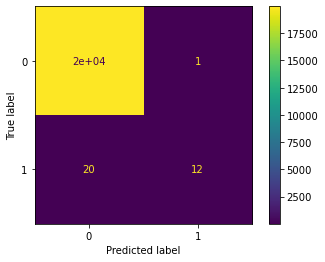

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

Será que ficou bom?

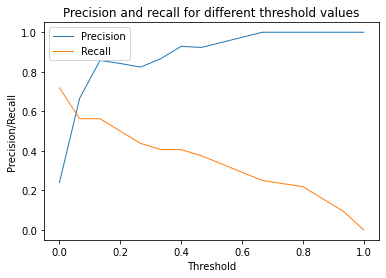

In [42]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score = clf.predict_proba(X_test)[:,1]
precision, recall, th = precision_recall_curve(y_test, y_score)

plt.plot(th, precision[1:], label="Precision",linewidth=1) 
plt.plot(th, recall[1:], label="Recall",linewidth=1) 
plt.title('Precision and recall for different threshold values') 
plt.xlabel('Threshold') 
plt.ylabel('Precision/Recall') 
plt.legend() 
plt.show()

In [43]:
y_pred = clf.predict_proba(X_test)[:,1] >= 0.5


confusion_matrix(y_test, y_pred)

array([[19967,     1],
       [   20,    12]], dtype=int64)

In [44]:
y_pred = clf.predict_proba(X_test)[:,1] >= 0.2

confusion_matrix(y_test, y_pred)

array([[19965,     3],
       [   14,    18]], dtype=int64)

In [45]:
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [46]:
# Vamos aproveitar para melhorar esse código da curva de precision e recall?

def plot_rp_curve(classificador, X_test, y_test):

    y_score = classificador.predict_proba(X_test)[:,1]
    
    precision, recall, th = precision_recall_curve(y_test, y_score)

    plt.plot(th, precision[1:], label="Precision",linewidth=1) 
    plt.plot(th, recall[1:], label="Recall",linewidth=1) 
    plt.title('Precision and recall for different threshold values') 
    plt.xlabel('Threshold') 
    plt.ylabel('Precision/Recall') 
    plt.legend() 
    plt.show()


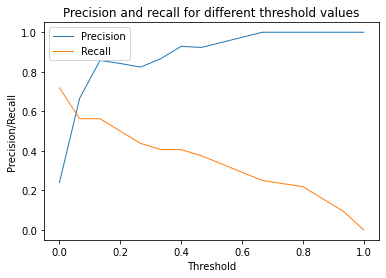

In [47]:
plot_rp_curve(clf, X_test, y_test)

### Balanceamento caseiro

In [48]:
# 
X_train


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
230233,-2.937856,-0.777447,-0.584056,-0.766860,-2.176300,1.761413,2.226366,0.108665,0.750296,-0.613717,...,-0.965620,-0.110320,0.962133,0.131943,0.329772,-0.082319,0.023843,-0.100216,-0.751451,500.00
226418,1.577739,-1.094004,-0.754551,0.568612,-0.669933,-0.084754,-0.317009,-0.042189,1.393985,-0.268471,...,0.259853,0.346863,0.736206,-0.084965,0.707484,-0.080356,-0.220650,-0.007569,0.005507,227.69
209128,1.822068,-0.730061,-0.337648,0.287901,-0.957297,-0.516207,-0.647136,0.062953,0.937940,0.223412,...,-0.088095,0.268515,0.675580,0.139345,0.109532,-0.450763,0.621835,-0.058734,-0.047047,79.00
116800,1.217769,-0.233493,0.732733,-0.153586,-0.780017,-0.458668,-0.438281,-0.080846,0.543504,-0.278820,...,0.103265,-0.028644,-0.103423,-0.023216,-0.056300,0.119798,0.985489,-0.051635,0.020299,43.25
36490,-0.416820,0.286581,1.018337,-1.866464,-0.317081,-0.585816,0.350627,-0.141178,-1.478267,0.414721,...,0.003092,0.332563,0.722205,-0.295637,0.037456,0.285016,-0.286924,-0.274881,-0.012855,35.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283457,-0.897789,1.769505,-1.903746,-0.146254,0.080330,-0.355971,-1.016931,-1.929671,-0.810758,-1.581314,...,0.267209,-0.846836,1.440168,0.157485,-0.541210,-0.294456,-0.165480,-0.321830,-0.147451,11.76
216007,0.160783,-2.313273,-0.848760,4.613512,-0.868044,0.422381,1.077712,-0.259029,-0.754410,0.860862,...,1.589620,0.139084,-1.486019,-0.297992,0.021487,-0.840215,-0.611113,-0.157237,0.128590,891.34
23823,1.144677,-1.102050,0.494801,-0.669567,-1.111119,0.255230,-0.953525,0.247096,-0.431526,0.647787,...,0.158882,0.263735,0.550414,-0.159684,-0.286075,0.376140,-0.114578,0.014905,0.015192,100.00
58047,-0.481206,0.996137,1.501295,1.315662,-0.052482,-0.216901,1.173334,-0.365159,-0.168740,0.203241,...,0.244467,-0.102692,0.222451,-0.196622,0.423198,-0.030981,-0.294125,0.158322,-0.037269,77.90


In [49]:
y_train

,target
230233,0
226418,0
209128,0
116800,0
36490,0
...,...
283457,0
216007,0
23823,0
58047,0


In [53]:
indices_zero = y_train[y_train['target'] == 0].index

indices_um = y_train[y_train['target']==1].index

In [59]:
qt = len(indices_um)
qt

139

In [64]:
random_index_zero = np.random.choice(indices_zero, qt, replace=False)
random_index_zero

array([  7688, 258290, 215034,  25214, 250445, 238699, 281941,  45924,
       156312,   7758, 258254, 268075, 200608,  60471,  33549,   2933,
         1139,  52672, 273283,  13969, 205460,  38020, 134274,  92201,
        83994,  60185, 227411,  30936,  82913, 252312, 126928,  69594,
        45154, 213622,  19566, 206365, 281717, 243860, 258107, 284187,
        27803,  23616, 230615,  46195, 222452, 180571,  39255, 196837,
       135547, 176668, 165562, 145723, 113851, 157966,  48718, 103737,
       181141, 260461, 104940,  10916, 257687, 134606, 251829, 284715,
       129975, 261126,  54199, 111081, 244027,  51127, 125273, 118538,
        91745, 128774, 227038, 229042, 199454,  17902, 124675,  98943,
       170455, 271097, 197479, 134554,  97995, 239900, 276921,  93802,
        93578, 262124,  69404, 279574, 271105, 177636,  84861, 207578,
       257454, 218244, 281921, 207031, 241339, 156786,  70341, 177719,
       204553, 238581,   5330, 257969, 188984, 106138, 102163,  56341,
      

In [68]:
X_sample = X_train.loc[random_index_zero.tolist() + indices_um.to_list()]
X_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7688,1.315863,0.054644,0.532096,0.029954,-0.494831,-0.703192,-0.318164,-0.207128,1.739593,-0.578801,...,-0.098196,-0.317405,-0.665138,0.046431,-0.130216,0.153928,0.897560,-0.099644,-0.002023,4.92
258290,-0.840042,-0.199742,1.317254,-1.574367,-0.032148,-0.202159,0.433055,0.020496,-1.555198,0.005473,...,-0.233295,0.044880,0.454555,-0.408224,-0.288715,0.820245,1.038165,-0.053111,0.035312,79.91
215034,1.429653,-1.415031,-0.614763,0.792571,-0.787539,0.547808,-0.469668,0.153097,1.591225,-0.300571,...,0.327314,0.442254,1.173787,-0.249912,0.869772,0.147505,-0.056304,-0.002018,-0.003591,262.78
25214,1.410782,-0.632586,-0.052290,-1.094561,-0.360746,0.327483,-0.774946,0.210124,-0.810720,0.789576,...,-0.003719,-0.060228,-0.344779,-0.020652,-1.201898,0.320050,-0.329366,0.007538,-0.008847,7.95
250445,1.982603,-1.523706,0.830182,0.126094,-2.104907,0.557778,-1.940182,0.309810,1.506575,0.450317,...,-0.568364,-0.289189,0.193384,0.224109,-0.051103,-0.479610,0.745750,0.067016,-0.029684,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,-7.297803,...,0.408704,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00
189878,-5.313774,2.664274,-4.250707,0.394707,-0.391383,0.683526,-5.133671,-7.907790,0.215475,-2.297734,...,-2.642902,8.664662,-2.716383,0.483559,0.079235,0.311065,0.555544,0.176740,0.362907,1.00
150684,-10.040631,6.139183,-12.972972,7.740555,-8.684705,-3.837429,-11.907702,5.833273,-5.731054,-12.438945,...,-0.082275,2.823431,1.153005,-0.567343,0.843012,0.549938,0.113892,-0.307375,0.061631,1.00
154234,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,5.804551,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1.00


In [69]:
y_sample = y_train.loc[random_index_zero.tolist() + indices_um.to_list()]
y_sample

,target
7688,0
258290,0
215034,0
25214,0
250445,0
...,...
6903,1
189878,1
150684,1
154234,1


In [70]:
y_sample['target'].value_counts()

1    139
0    139
Name: target, dtype: int64

In [72]:

clf2 = KNeighborsClassifier(n_neighbors=15).fit(X_sample, y_sample['target'])

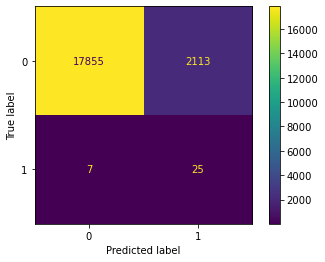

In [73]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf2, X_test, y_test)

In [75]:
y_pred = clf2.predict_proba(X_test)[:,1] >= 0.8

confusion_matrix(y_test, y_pred)

array([[19964,     4],
       [   18,    14]], dtype=int64)

### Vamos conhecer uma lib que elabora isso de forma mais sofisticada

In [ ]:
imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

## Oversampling?

Significa aumentar de forma artificial a quantidade de amostras da classe que tem menor quantidade!

In [76]:
from imblearn.over_sampling import RandomOverSampler


In [77]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

In [80]:
X_train.shape

(80000, 29)

In [81]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [82]:
X_over.shape

(159722, 29)

In [83]:
y_over['target'].value_counts()

1    79861
0    79861
Name: target, dtype: int64

In [84]:
clf3 = KNeighborsClassifier(n_neighbors=15).fit(X_over, y_over['target'])

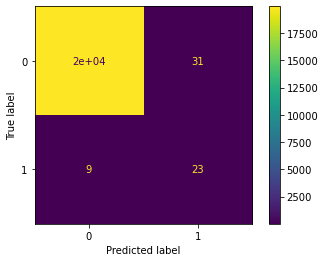

In [86]:
plot_confusion_matrix(clf3, X_test, y_test)

In [88]:
y_pred = clf3.predict_proba(X_test)[:,1] >= 0.8

confusion_matrix(y_test, y_pred)

array([[19948,    20],
       [    9,    23]], dtype=int64)

Talvez esse modelo tenha melhorado um pouco, ainda seria necessário uma exploração de seu parâmetros

### Logistic Regression...

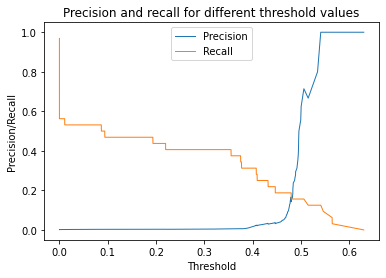

In [89]:
from sklearn.linear_model import LogisticRegression

max_iter=10000

clf3 = LogisticRegression(C=0.2, max_iter=max_iter, solver='saga').fit(X_train, y_train['target'])


y_pred = clf3.predict(X_test)

plot_rp_curve(clf3, X_test, y_test)

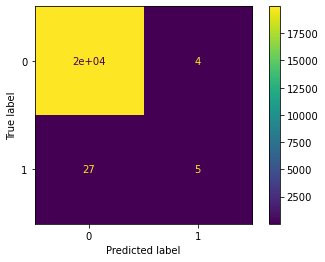

In [90]:
plot_confusion_matrix(clf3, X_test, y_test)

In [92]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X_under, y_under = undersample.fit_resample(X_train, y_train)

In [94]:
y_under['target'].value_counts()

1    139
0    139
Name: target, dtype: int64

In [95]:
clf4 = LogisticRegression(C=0.2, max_iter=10000, solver='saga').fit(X_under, y_under['target'])

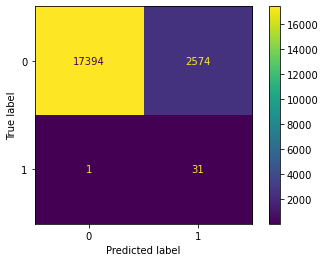

In [96]:
plot_confusion_matrix(clf4, X_test, y_test)

In [101]:
y_pred = clf4.predict_proba(X_test)[:,1] >= 0.9

confusion_matrix(y_test, y_pred)

array([[19961,     7],
       [    9,    23]], dtype=int64)

Esse modelo mostra muito potencial!

Repare que usando o undersampling, reduzimos o tempo de treinamento + validação de 1m30s para menos de 1s. Ou seja, uma busca de parâmetros nesse caso vai ser MUITO mais ágil.

# Em resumo:

Não existe uma resposta única que resolve qualquer problema, rebalancear as classes **pode reduzir** a qualidade do modelo, ou seja **o resultado precisa ser estudado** + ciclos de testes e ajustes. Dados rebalanceados podem permitir uma busca de hiperparâmetros diferentes!

## Pickling ou _como eu salvo o meu modelo?_

A lib pickle é padrão do Python e basicamente escreve em um arquivo os bytes que compõem a variável. Qualquer objeto que fique registrado em uma variável pode ser tratado desta forma.

In [103]:
import pickle

with open('estimador_letscode.ia', 'wb') as file:
    pickle.dump(clf4, file)

Você pode verificar por si mesmo. Rode a célula de cima, certifique-se de que o arquivo **estimador_letscode.ia** for escrito e então reinicie o kernel do notebook. Após isso você pode rodar as células abaixo e verá que o modelo é carregado novamente para a variável clf4.


In [1]:
import numpy as np
array = np.array([[-2.93785581e+00, -7.77446744e-01, -5.84055714e-01, -7.66860003e-01,
       -2.17629987e+00,  1.76141271e+00,  2.22636634e+00,  1.08664708e-01,
        7.50296445e-01, -6.13716868e-01,  1.50938463e-01,  3.91932992e-01,
       -4.91717246e-02, -1.53710197e-01, -2.12975117e-01,  8.17145976e-01,
       -9.64275628e-01,  8.91032616e-01,  2.01905290e-01, -9.65619869e-01,
       -1.10320222e-01,  9.62133119e-01,  1.31943254e-01,  3.29771855e-01,
       -8.23188462e-02,  2.38426556e-02, -1.00216094e-01, -7.51450816e-01,
        5.00000000e+02]])
array

array([[-2.93785581e+00, -7.77446744e-01, -5.84055714e-01,
        -7.66860003e-01, -2.17629987e+00,  1.76141271e+00,
         2.22636634e+00,  1.08664708e-01,  7.50296445e-01,
        -6.13716868e-01,  1.50938463e-01,  3.91932992e-01,
        -4.91717246e-02, -1.53710197e-01, -2.12975117e-01,
         8.17145976e-01, -9.64275628e-01,  8.91032616e-01,
         2.01905290e-01, -9.65619869e-01, -1.10320222e-01,
         9.62133119e-01,  1.31943254e-01,  3.29771855e-01,
        -8.23188462e-02,  2.38426556e-02, -1.00216094e-01,
        -7.51450816e-01,  5.00000000e+02]])

In [4]:
clf4

LogisticRegression(C=0.2, max_iter=10000, solver='saga')

In [3]:
import pickle

with open('estimador_letscode.ia', 'rb') as file:
    clf4 = pickle.load(file)

In [5]:
clf4.predict_proba(array)

array([[0.81310497, 0.18689503]])

In [10]:
with open('string.ia', 'wb') as file:
    pickle.dump('LETS CODE', file)

In [9]:
from imblearn.under_sampling import RandomUnderSampler

with open('string.ia', 'wb') as file:
    pickle.dump(RandomUnderSampler, file)

In [7]:

with open('string.ia', 'rb') as file:
    pickle.load(file)

LETS CODE
